# CS445 Lab 4 by Alex Boyce

To get started, we need to import the necessary libraries and load the data file. The data file we will be using, 'cb_2020_us_cousub_500k.shp' contains geographic data for the  United States.

In [1]:
#Lab4.py

import geopandas
import matplotlib.pyplot as plt
import warnings
from collections import Counter

#ignore warnings
warnings.filterwarnings("ignore", category=UserWarning, append=True)
warnings.filterwarnings("ignore", category=RuntimeWarning, append=True)

#read cb_2020_us_cousub_500k.shp
geoData = geopandas.read_file('cb_2020_us_cousub_500k.shp')

#print head
print(geoData.head())

#print column names
print(geoData.columns)

#print the crs set in the data file
print("Current crs:", geoData.crs)
#reproject it's coordinates to Mercator
geoData = geoData.to_crs("EPSG:3395")
#print the new crs
print("Set crs to:", geoData.crs)

#exclude non-contiguous states
excluded_states = {'AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS','DC'}

#filter using this set
geoData = geoData[~geoData['STUSPS'].isin(excluded_states)]

#dissolve to create state boundaries
states = geoData.dissolve(by='STUSPS', as_index=False, aggfunc='first')

  STATEFP COUNTYFP COUSUBFP  COUSUBNS             AFFGEOID       GEOID  \
0      29      195    22096  00767361  0600000US2919522096  2919522096   
1      38      099    45260  01036531  0600000US3809945260  3809945260   
2      38      017    16100  01036391  0600000US3801716100  3801716100   
3      38      093    22940  01036472  0600000US3809322940  3809322940   
4      38      079    67780  01036243  0600000US3807967780  3807967780   

       NAME           NAMELSAD STUSPS       NAMELSADCO    STATE_NAME LSAD  \
0   Elmwood   Elmwood township     MO    Saline County      Missouri   44   
1    Latona    Latona township     ND     Walsh County  North Dakota   44   
2   Cornell   Cornell township     ND      Cass County  North Dakota   44   
3  Eldridge  Eldridge township     ND  Stutsman County  North Dakota   44   
4   Rolette       Rolette city     ND   Rolette County  North Dakota   25   

       ALAND   AWATER                                           geometry  
0  181233131   37

We excluded non-contiguous states from the dataset, as we are just focusing on the 48 lower States. We then dissolved the data to create state boundaries. The dissolve function combines all geometries in a group into a single geometry, which is useful for creating state boundaries.

### Base Map

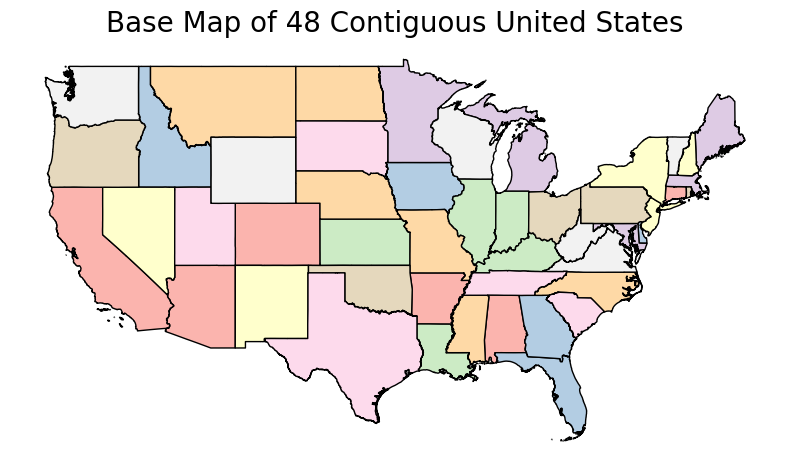

baseMap Generated


In [2]:
#Visualize the Map of the United States
def baseMap():
    fig, ax = plt.subplots(figsize=(8, 5))
    states.plot(ax=ax, edgecolor='black', cmap='Pastel1')
    ax.set_title("Base Map of 48 Contiguous United States", fontsize=20)

    #turn off axis and tighten layout
    ax.axis('off')
    plt.tight_layout()

    # Save before show
    fig.savefig('Boyce_baseMap.png')
    plt.show()

    print("baseMap Generated")

baseMap()

This base map shows us this single geometry we just created by dissolve.

### Geographic Data Map

AL — Alabama
AR — Arkansas
AZ — Arizona
CA — California
CO — Colorado
CT — Connecticut
DE — Delaware
FL — Florida
GA — Georgia
IA — Iowa
ID — Idaho
IL — Illinois
IN — Indiana
KS — Kansas
KY — Kentucky
LA — Louisiana
MA — Massachusetts
MD — Maryland
ME — Maine
MI — Michigan
MN — Minnesota
MO — Missouri
MS — Mississippi
MT — Montana
NC — North Carolina
ND — North Dakota
NE — Nebraska
NH — New Hampshire
NJ — New Jersey
NM — New Mexico
NV — Nevada
NY — New York
OH — Ohio
OK — Oklahoma
OR — Oregon
PA — Pennsylvania
RI — Rhode Island
SC — South Carolina
SD — South Dakota
TN — Tennessee
TX — Texas
UT — Utah
VA — Virginia
VT — Vermont
WA — Washington
WI — Wisconsin
WV — West Virginia
WY — Wyoming


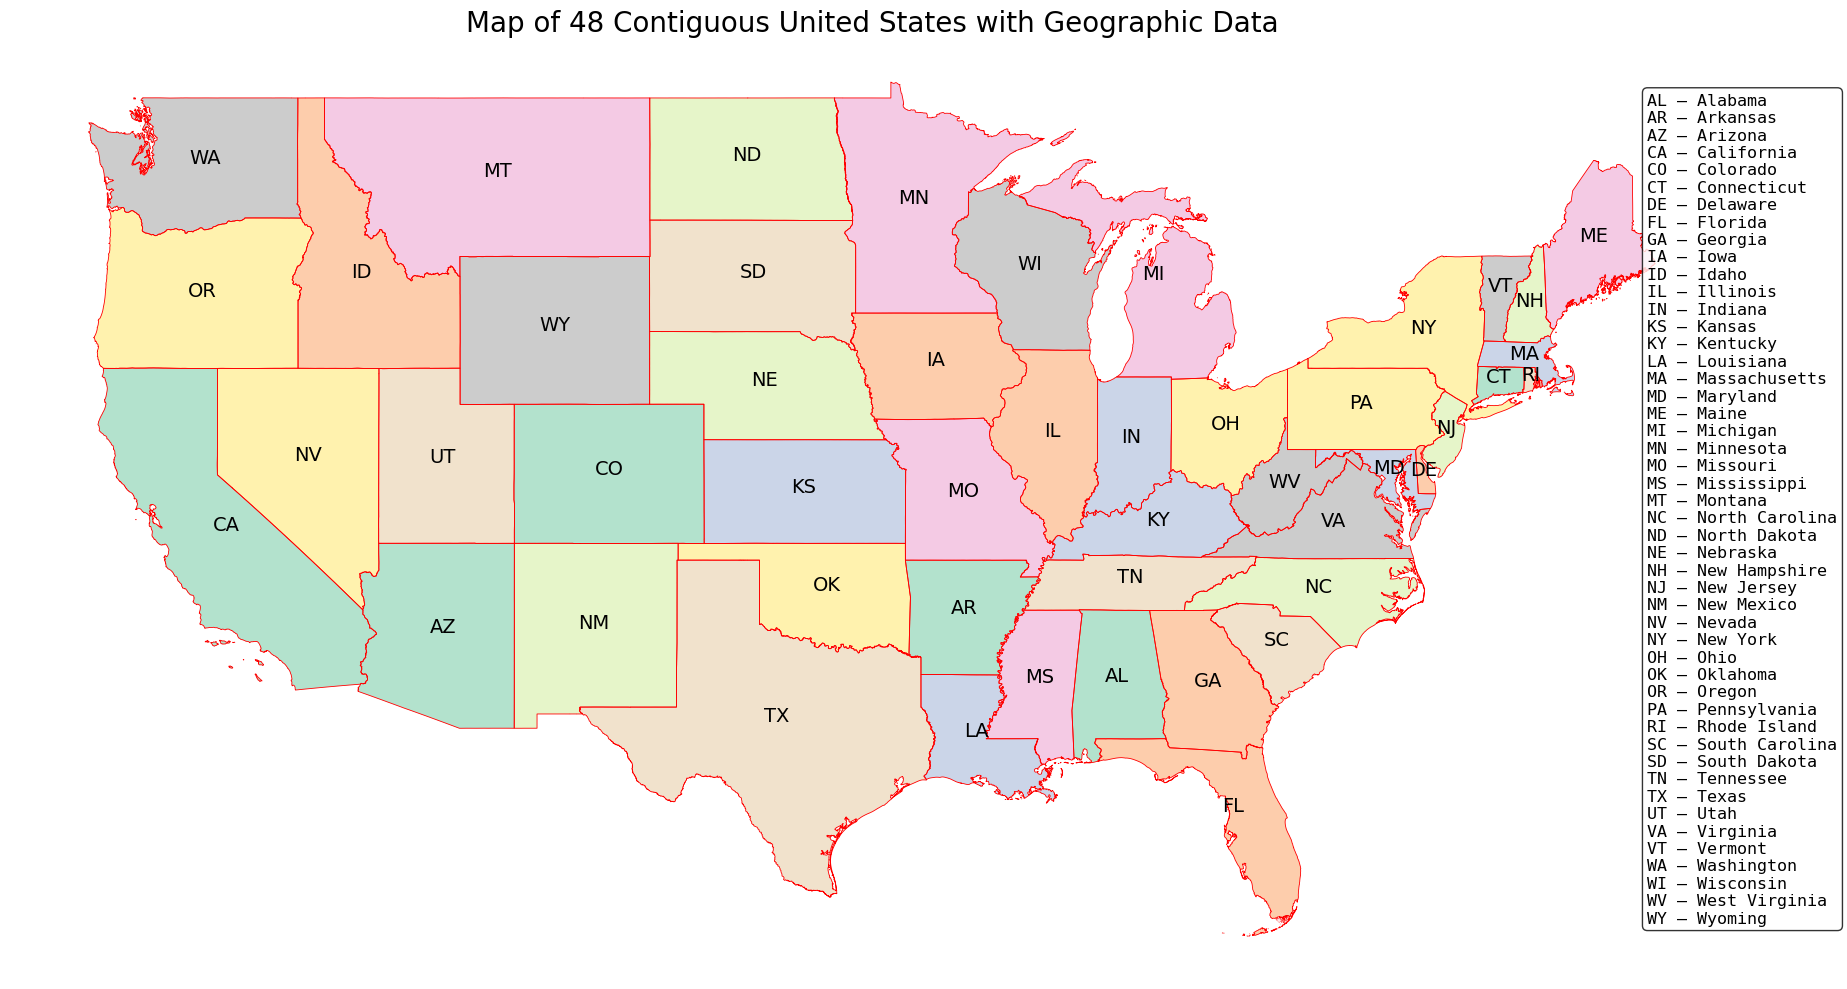

geoMap Generated


In [3]:
#Visualize the Distribution of geographic data
def geoMap():
    fig = plt.figure(1, figsize=(20, 10))
    ax = fig.add_subplot()
    ax.set_title("Map of 48 Contiguous United States with Geographic Data", fontsize=20)

    #plot the state names
    states.apply(lambda x: ax.annotate(x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14), axis=1)

    #plot the state boundaries
    states.boundary.plot(ax=ax, color='Red', linewidth=.6)

    #plot the states
    states.plot(ax=ax, cmap='Pastel2')

    #turn off axis and tighten layout
    ax.axis('off')
    plt.tight_layout()

    #legend text box
    key_text = "\n".join([f"{abbr} — {name}" for abbr, name in zip(states['STUSPS'], states['STATE_NAME'])])

    #debug
    print(key_text)

    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    ax.text(0.95, 0.5, key_text, transform=ax.transAxes, fontsize=12, verticalalignment='center', bbox=props, family='monospace')

    plt.show()
    fig.savefig('Boyce_geoMap.png')     # save the map as a png file
    print("geoMap Generated")

geoMap()

This map shows the distribution of the geographic data in the dataset. The state abbreviations are plotted on the map, and the state boundaries are outlined in red. A legend is also included to show the state names and their corresponding abbreviations.

### Visualize the Data

Now that we have the base map and the geographic data map, we can visualize some of the data in the dataset.

#### Land Area per State Bar Chart

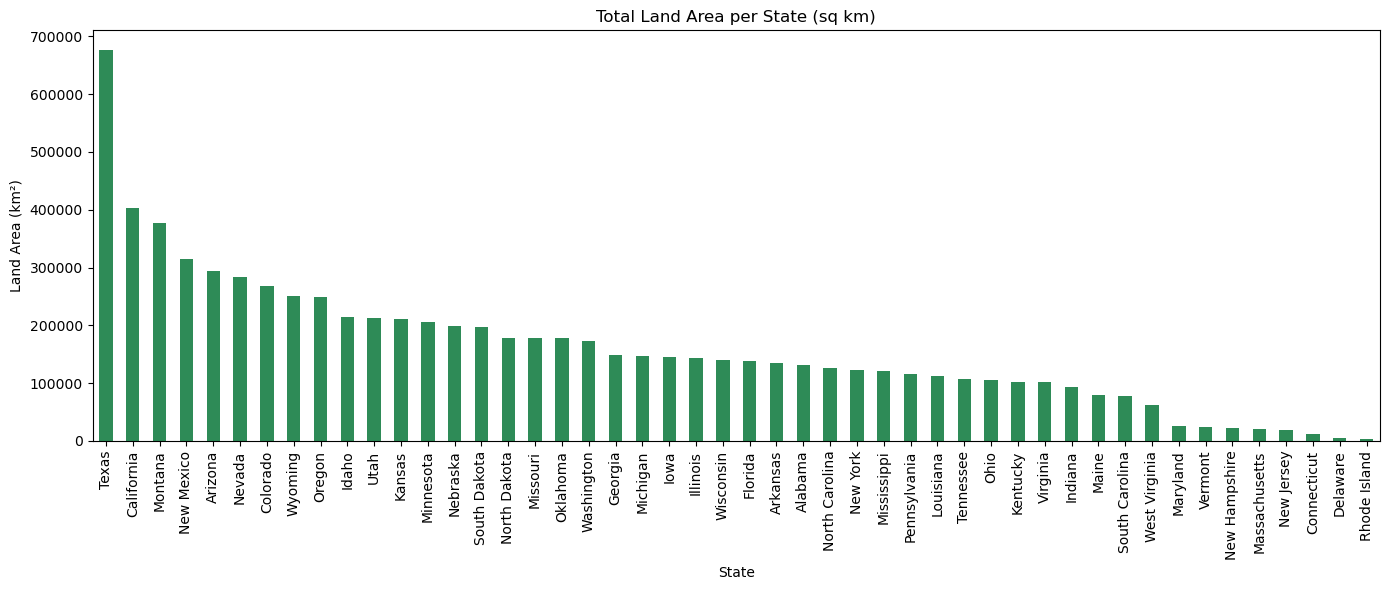

Total Land Area per State


In [4]:
def landArea():
    #convert to square kilometers
    state_land = geoData.groupby('STATE_NAME')['ALAND'].sum() / 1e6
    #sort values
    state_land = state_land.sort_values(ascending=False)

    #plot setup
    state_land.plot(kind='bar', figsize=(14, 6), color='seagreen')
    plt.title('Total Land Area per State (sq km)')
    plt.ylabel('Land Area (km²)')
    plt.xlabel('State')
    plt.xticks(rotation=90)
    plt.tight_layout()

    #save the plot as a png file
    plt.savefig('Boyce_landArea.png')
    plt.show()
    print("Total Land Area per State")
landArea()

This bar chart shows the total land area per state in square kilometers. The states are sorted in descending order, with the largest states at the top. This gives us a good idea of the relative size of each state. With that in mind, as we are excluding Alaska our data shows that Texas is the largest state in the contiguous US, with a land area of 695,662 km². The second largest state is California, with a land area of 403,932 km². The smallest state is Rhode Island, with a land area of 2,678 km².

#### Top 10 States by Water Area

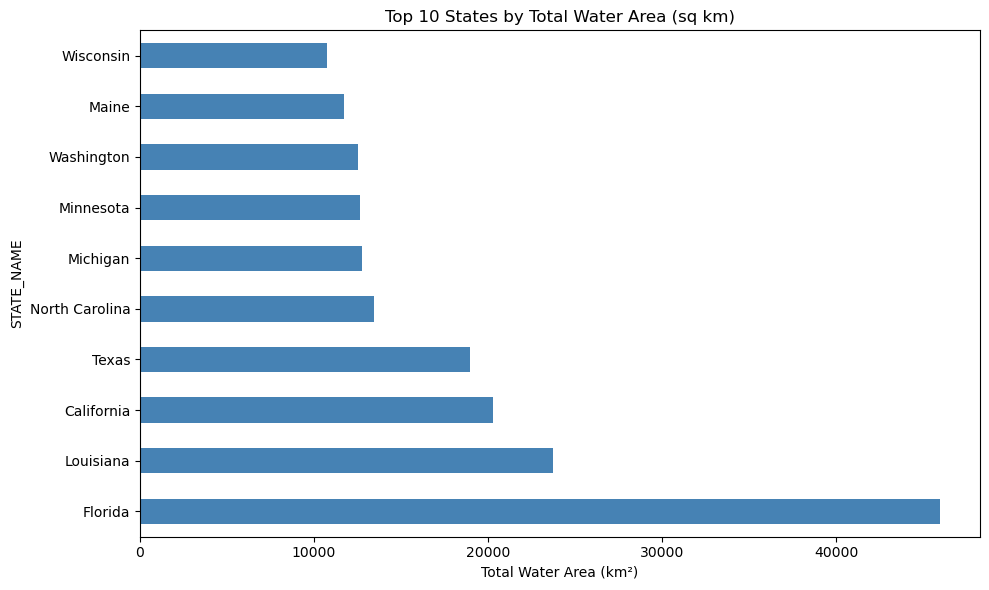

Top 10 States by Water Area


In [5]:
def top10water():
    #convert to square kilometers
    state_water = geoData.groupby('STATE_NAME')['AWATER'].sum() / 1e6
    #sort values
    top10 = state_water.sort_values(ascending=False).head(10)

    #plot setup
    top10.plot(kind='barh', figsize=(10, 6), color='steelblue')
    plt.title('Top 10 States by Total Water Area (sq km)')
    plt.xlabel('Total Water Area (km²)')
    plt.tight_layout()

    #save the plot as a png file
    plt.savefig('Boyce_top10water.png')
    plt.show()
    print("Top 10 States by Water Area")

top10water()

This horizontal bar chart shows the top 10 states by total water area in square kilometers. According to the dataset, the largest state by water area is Florida. This is not surprising, as Florida is known for its many lakes, swamps, rivers, and is home to the Everglades. Disney world is built on a swamp, after all.

#### Vowel Count per State Name

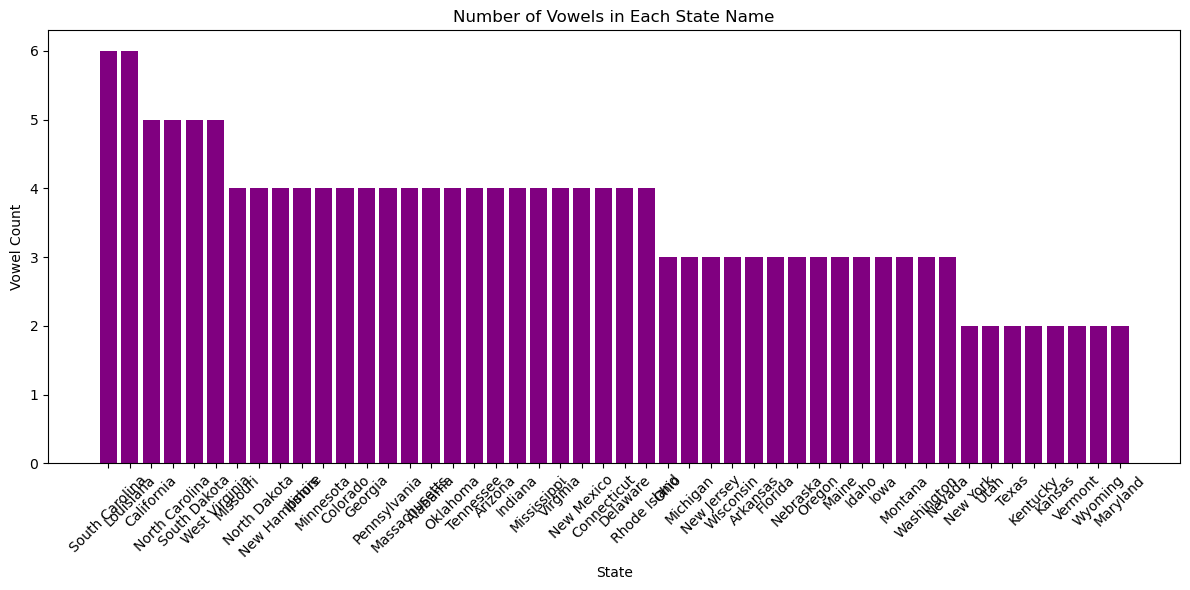

States by Vowel Count


In [6]:
def vowel_count():

    #count vowels in a state name
    def count_vowels(name):
        return sum(1 for c in name.lower() if c in 'aeiou')

    #get unique state names
    unique_states = geoData['STATE_NAME'].drop_duplicates()

    #list of (state, vowel_count) tuples
    state_vowel_counts = [(state, count_vowels(state)) for state in unique_states]

    #sort by vowel count
    state_vowel_counts.sort(key=lambda x: x[1], reverse=True)

    #convert to lists for plotting
    states, counts = zip(*state_vowel_counts)

    #plot setup
    plt.figure(figsize=(12, 6))
    plt.bar(states, counts, color='purple')
    plt.title('Number of Vowels in Each State Name')
    plt.xlabel('State')
    plt.ylabel('Vowel Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

    #save the plot as a png file
    plt.savefig('Boyce_vowel_counts.png')
    plt.show()
    print("States by Vowel Count")

vowel_count()

This visualization was more for fun, and shows the states with the most vowels in their names. This might be useful for a game of Scrabble, or if you are trying to name your child after a state - if you are into that sort of thing.

#### Most Common Starting Letters in State Names

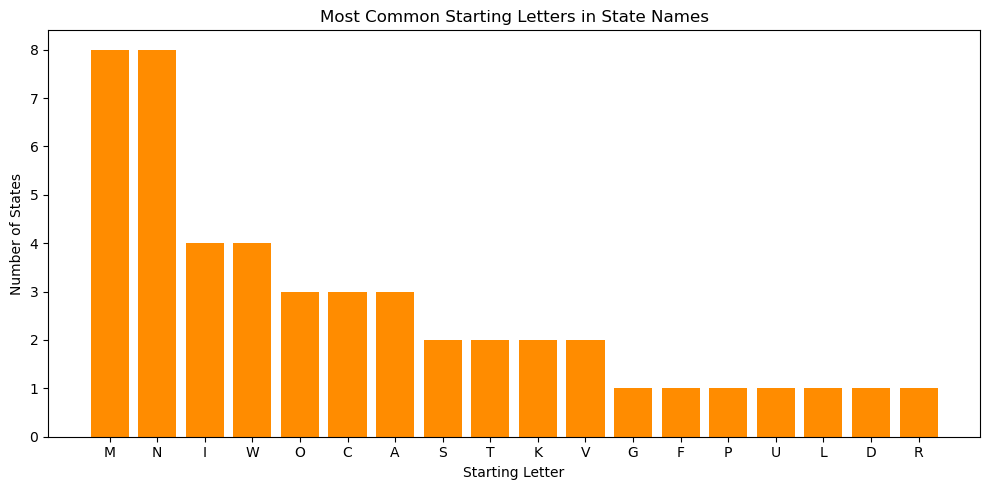

Most Common Starting Letters


In [7]:
def starting_letters():
    #get the first letter of each unique state name
    initials = geoData['STATE_NAME'].drop_duplicates().str[0].str.upper()
    initial_counts = Counter(initials)

    #convert to sorted lists for plotting
    letters, counts = zip(*sorted(initial_counts.items(), key=lambda x: x[1], reverse=True))

    #plot setup
    plt.figure(figsize=(10, 5))
    plt.bar(letters, counts, color='darkorange')
    plt.title('Most Common Starting Letters in State Names')
    plt.xlabel('Starting Letter')
    plt.ylabel('Number of States')
    plt.tight_layout()

    #save the plot as a png file
    plt.savefig('Boyce_letters.png')
    plt.show()
    print("Most Common Starting Letters")

starting_letters()

This visualization shows the most common starting letters in state names. This is done by simply counting the first letter of each state name, and keeping track of the actual letters counted. When you are trying to name your new island nation, pick a letter that is not common to start with. By this reasoning, you would be able to use this data visualization to stand out from all the common starting letters.

#### Land vs. Water Area by State

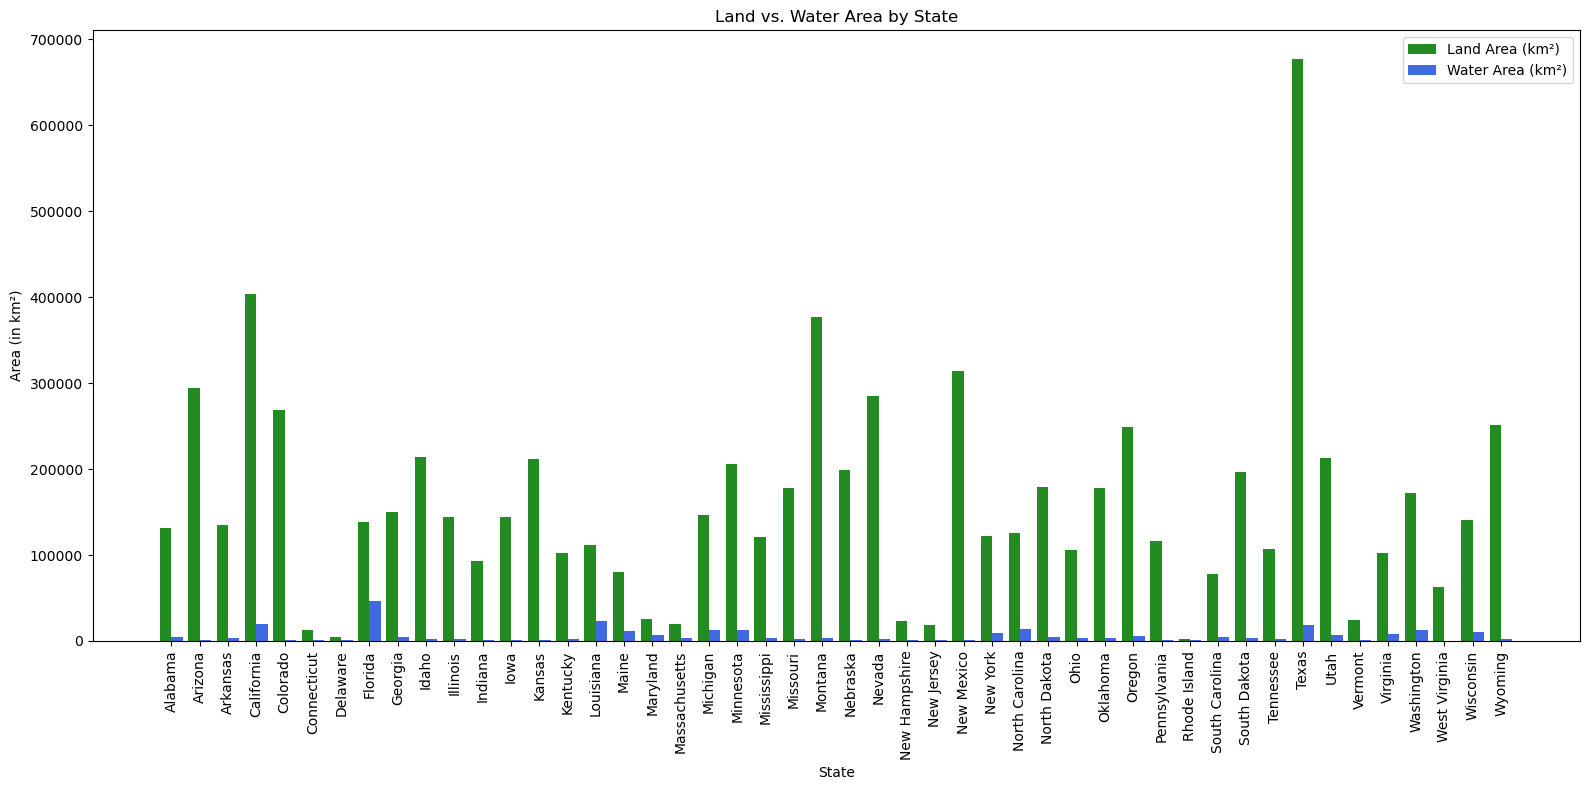

Land vs. Water Area by State


In [8]:
def land_vs_water():
    import numpy as np

    #aggregate land and water area by state
    area_by_state = geoData.groupby('STATE_NAME')[['ALAND', 'AWATER']].sum()

    #convert to square kilometers
    area_by_state_km2 = area_by_state / 1e6

    #plot setup
    states = area_by_state_km2.index
    x = np.arange(len(states))
    width = 0.4

    plt.figure(figsize=(16, 8))
    plt.bar(x - width/2, area_by_state_km2['ALAND'], width, label='Land Area (km²)', color='forestgreen')
    plt.bar(x + width/2, area_by_state_km2['AWATER'], width, label='Water Area (km²)', color='royalblue')

    plt.xlabel('State')
    plt.ylabel('Area (in km²)')
    plt.title('Land vs. Water Area by State')
    plt.xticks(x, states, rotation=90)
    plt.legend()
    plt.tight_layout()

    #save the plot as a png file
    plt.savefig('Boyce_land_vs_water.png')
    plt.show()
    print("Land vs. Water Area by State")

land_vs_water()

This bar chart shows land vs. water area by state according to our dataset. To accomplish this, we first aggregated the ALAND and AWATER by state, then converted the values to square kilometers. We then plotted the land and water area side by side for each state, with a legend to indicate which is which. With this data view, we know about how much of a states size is land vs. water. If you someday plan to invade the US, this data visualization will help you decide how large of a fleet you will need to bring with you per state. It would be very hard to sail a battleship into Kansas...